In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [4]:
df_Iris=pd.read_csv('/Users/karimsalah/Documents/Diploma/ML/Project1/Iris.csv')
df_Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df_Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

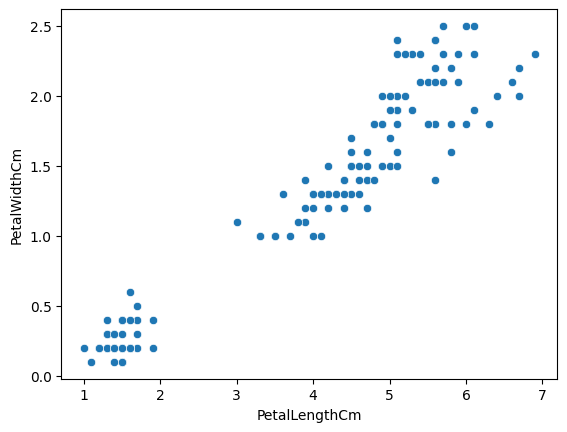

In [6]:
sns.scatterplot(data=df_Iris,x='PetalLengthCm',y='PetalWidthCm')


In [9]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
df_Iris.drop(columns='Id',inplace=True)
df_Iris_scaled = sc.fit_transform(df_Iris.iloc[:,0:4]) #getting only the needed features without species column 
df_Iris_scaled


array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

<Axes: >

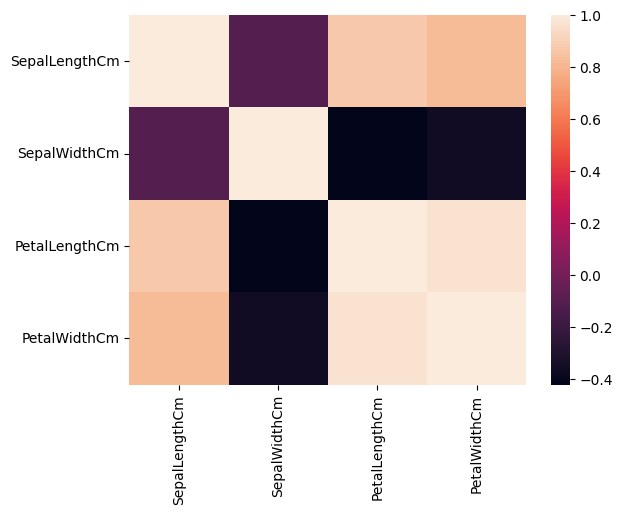

In [11]:
sns.heatmap(df_Iris.iloc[:,0:4].corr())

In [12]:
df_Iris.iloc[:,0:4].corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [ ]:
# as shown correlation between petalLengthcm and petalwidthcm is very high 0.96 which means we could drop one feature as feature selection as no more info will be a gain from both feature due to high correlation between them 

In [13]:
df_Iris1=df_Iris.loc[:,['SepalLengthCm','SepalWidthCm','PetalLengthCm']] # getting only 3 features to a new dataframe
df_Iris_scaled1=sc.fit_transform(df_Iris1) # scaling the new one

# Also we could apply PCA and will try it at the end 

In [14]:
from sklearn.cluster import KMeans

In [15]:
ssd1 = []
# getting K for 3 features model
for k in range(2,10):
    
    model1 = KMeans(n_clusters=k)
    
    
    model1.fit(df_Iris_scaled1)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd1.append(model1.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

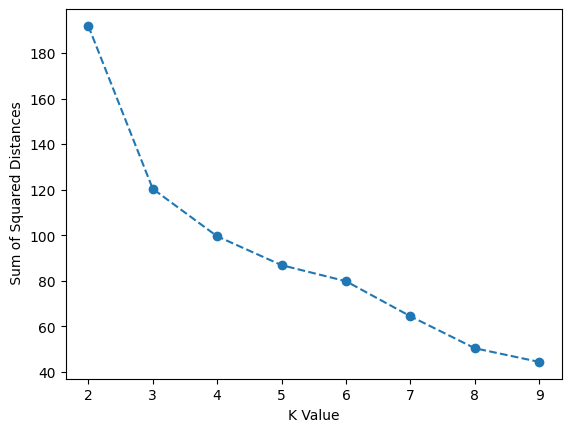

In [16]:
plt.plot(range(2,10),ssd1,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [22]:
kmeans = KMeans(n_clusters = 3)
y_kmeans1 = kmeans.fit_predict(df_Iris_scaled1)
# 3 features model

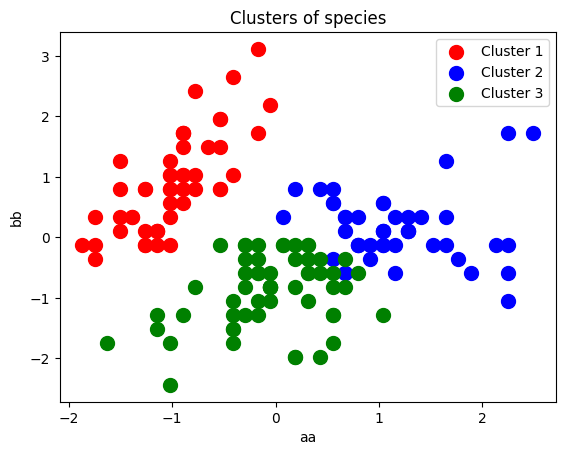

In [23]:
plt.scatter(df_Iris_scaled1[y_kmeans1 == 0, 0], df_Iris_scaled1[y_kmeans1 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df_Iris_scaled1[y_kmeans1 == 1, 0], df_Iris_scaled1[y_kmeans1 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df_Iris_scaled1[y_kmeans1 == 2, 0], df_Iris_scaled1[y_kmeans1 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(df_Iris_scaled1[y_kmeans1 == 3, 0], df_Iris_scaled1[y_kmeans1 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(df_Iris_scaled[y_kmeans == 5, 0], df_Iris_scaled[y_kmeans == 5, 1], s = 100, c = 'yellow', label = 'Cluster 6')
#plt.scatter(df_Iris_scaled[y_kmeans == 6, 0], df_Iris_scaled[y_kmeans == 6, 1], s = 100, c = 'purple', label = 'Cluster 7')
plt.title('Clusters of species')
plt.xlabel('aa')
plt.ylabel('bb')
plt.legend()
plt.show()

# not an accurate plot as they are 3 features 


In [24]:
from sklearn.metrics import silhouette_score

silhouette_score(df_Iris_scaled1, y_kmeans1)
# 3 features model score

np.float64(0.4629443546221593)

In [25]:
ssd2 = []
# getting K using all features 
for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(df_Iris_scaled)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd2.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

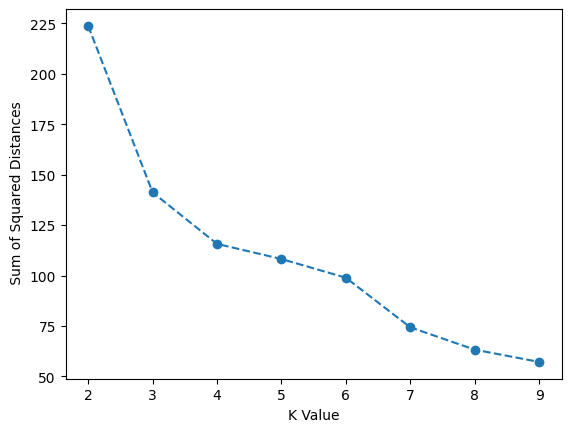

In [26]:
plt.plot(range(2,10),ssd2,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [32]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(df_Iris_scaled)
#applying kmeans using K =3 for all features

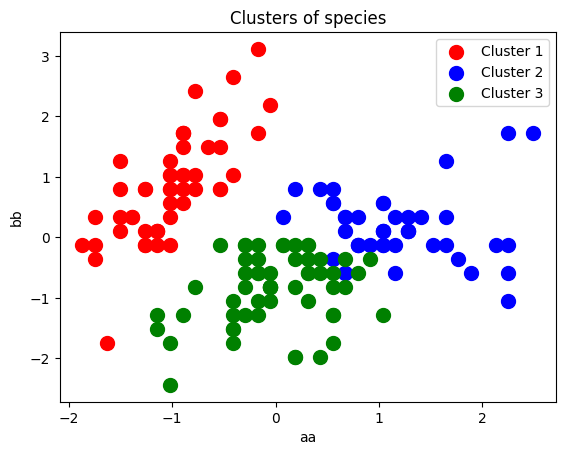

In [33]:
plt.scatter(df_Iris_scaled[y_kmeans == 0, 0], df_Iris_scaled[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(df_Iris_scaled[y_kmeans == 1, 0], df_Iris_scaled[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(df_Iris_scaled[y_kmeans == 2, 0], df_Iris_scaled[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(df_Iris_scaled[y_kmeans == 3, 0], df_Iris_scaled[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(df_Iris_scaled[y_kmeans == 5, 0], df_Iris_scaled[y_kmeans == 5, 1], s = 100, c = 'yellow', label = 'Cluster 6')
#plt.scatter(df_Iris_scaled[y_kmeans == 6, 0], df_Iris_scaled[y_kmeans == 6, 1], s = 100, c = 'purple', label = 'Cluster 7')
plt.title('Clusters of species')
plt.xlabel('aa')
plt.ylabel('bb')
plt.legend()
plt.show()

# not an accurate plot as they are 4 features 

In [ ]:
# Not an accurate Plot as they are 4 features 

In [34]:
from sklearn.metrics import silhouette_score

silhouette_score(df_Iris_scaled, y_kmeans)
# nearly score to 3 features model

np.float64(0.46214947389312017)

In [35]:
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D

In [44]:
kmeans = KMeans(n_clusters = 3)
y_kmeans_lab = kmeans.fit(df_Iris_scaled1)
# here applying only fit not fit predict to create labels and give it to the scatter function

Text(0.5, 0.92, '3D K-means Clustering')

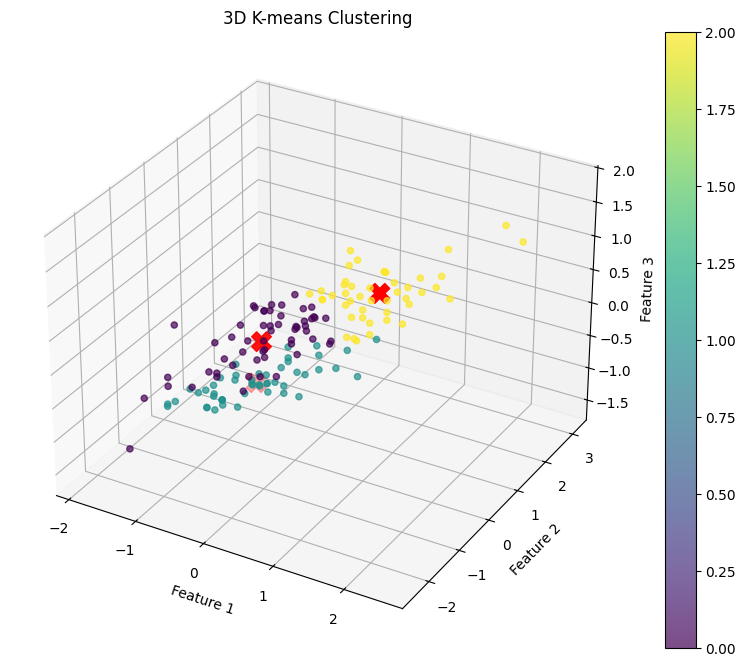

In [45]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
labels=y_kmeans_lab.labels_
scatter = ax.scatter(df_Iris_scaled1[:, 0], df_Iris_scaled1[:, 1], df_Iris_scaled1[:, 2], c=labels, cmap='viridis', alpha=0.7)
fig.colorbar(scatter, ax=ax)
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=200, c='red', marker='X', label='Centroids')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D K-means Clustering')
#this is a 3D scatter plot for the 3 features selected 

In [46]:
silhouette_score(df_Iris_scaled1, labels)

np.float64(0.4629443546221593)

In [ ]:
#last option we will use is PCA  .
from sklearn.decomposition import PCA
pca= PCA()
df_Iris_pca = pca.fit_transform(df_Iris_scaled)

Explained Variance Ratio of each component: [0.72770452 0.23030523 0.03683832 0.00515193]


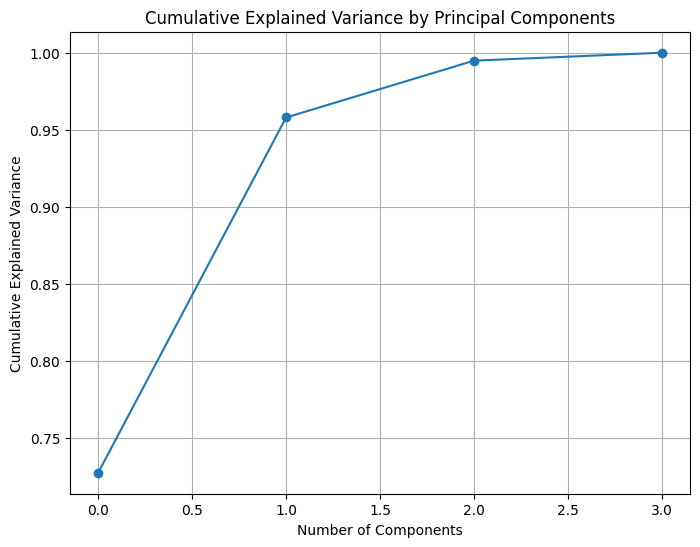

In [48]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio of each component:", explained_variance_ratio)

# Step 4: Plot the cumulative explained variance to decide on the number of components
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.title("Cumulative Explained Variance by Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

In [71]:
ssd3 = []
# getting K using all features 
for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(df_Iris_pca)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd3.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

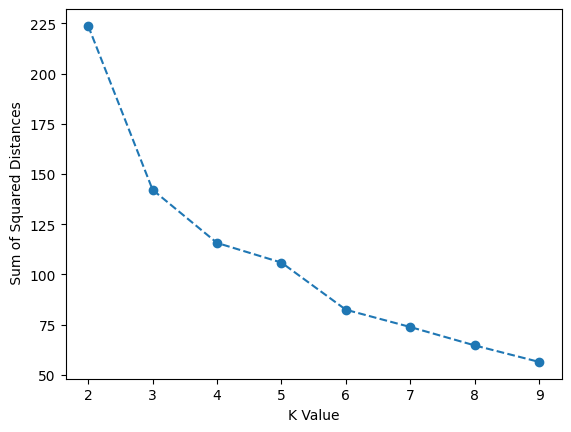

In [72]:
plt.plot(range(2,10),ssd3,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [199]:
kmeans_pca = KMeans(n_clusters = 3)
y_kmeans_pca = kmeans_pca.fit_predict(df_Iris_pca)

In [200]:
print(silhouette_score(df_Iris_pca, y_kmeans_pca))
print(kmeans.cluster_centers_)

0.4986232093385642
[[ 1.11009664 -0.14611241 -0.02197756  0.00895807]
 [-2.23898195  1.50909689  0.04844862  0.00639746]
 [-2.21359186 -0.13532483  0.04237631 -0.02645877]]


In [ ]:
# at both scenarios with 3 features and 4 features silhouette score is nearly the same with K=3 using elbow method to indicate K value which is number of clusters. 
# but using PCA silhouette score increased reaching 0.498 nearly 0.5 
# so best value reached for K means after 3 different scenarios is using PCA with silhouette score = 0.4986


In [ ]:
#Second task Hierarchical/Agglomerative.

In [127]:
from sklearn.cluster import AgglomerativeClustering

In [133]:
num_cluster= np.arange(3,20)
scores=[]
for k in num_cluster:
    model = AgglomerativeClustering(n_clusters=k)
    cluster_labels = model.fit_predict(df_Iris_scaled)
    scores.append(silhouette_score(df_Iris_scaled, cluster_labels))
    
print(scores)

[np.float64(0.44553956399200406), np.float64(0.3993263633623272), np.float64(0.35497024823527595), np.float64(0.3371506358501898), np.float64(0.3393292929560809), np.float64(0.33975793858918524), np.float64(0.34452464758135287), np.float64(0.3270112884176204), np.float64(0.31014621678056253), np.float64(0.3161923417272293), np.float64(0.32846251627209816), np.float64(0.32771682119984985), np.float64(0.3315601887555304), np.float64(0.3253144073490457), np.float64(0.3328789781470412), np.float64(0.33542865306095465), np.float64(0.33697660727198947)]


In [307]:
num_cluster_pca= np.arange(3,20)
scores_pca=[]
for k in num_cluster_pca:
    model_pca = AgglomerativeClustering(n_clusters=k)
    cluster_labels_pca = model_pca.fit_predict(df_Iris_pca)
    scores_pca.append(silhouette_score(df_Iris_pca, cluster_labels_pca))
    
print(scores_pca)

[np.float64(0.44553956399200406), np.float64(0.399326363362327), np.float64(0.35497024823527595), np.float64(0.33715063585018973), np.float64(0.33932929295608083), np.float64(0.33975793858918524), np.float64(0.344524647581353), np.float64(0.3270112884176204), np.float64(0.31014621678056253), np.float64(0.31619234172722926), np.float64(0.32846251627209816), np.float64(0.32771682119984985), np.float64(0.33156018875553045), np.float64(0.3253144073490457), np.float64(0.33287897814704126), np.float64(0.3354286530609547), np.float64(0.3369766072719895)]


In [264]:
# Starting DBSCAN
from sklearn.cluster import DBSCAN
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2)
    cluster_labels = dbscan.fit_predict(df_Iris_scaled)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(cluster_labels)
    
    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

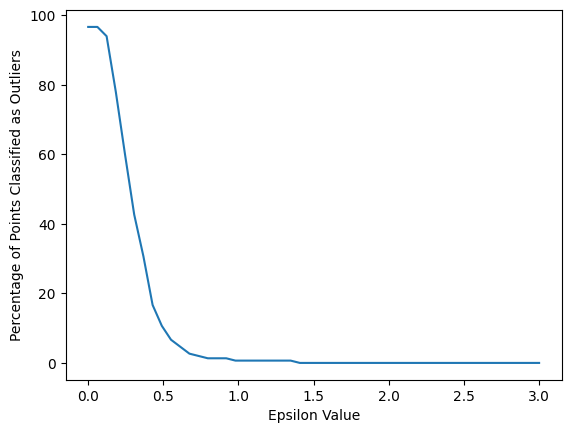

In [265]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

In [ ]:
dbscan = DBSCAN(eps=0.9, min_samples=2)
cluster_labels = dbscan.fit_predict(df_Iris_scaled)
print(silhouette_score(df_Iris_scaled, cluster_labels))
unique_labels = np.unique(cluster_labels)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)  # Exclude noise points (-1)
print(f"Number of clusters: {num_clusters}")


0.48612383626680866
Number of clusters: 3


In [273]:
outlier_percent1 = []

for eps in np.linspace(0.001,3,50):
    
    # Create Model
    dbscan1 = DBSCAN(eps=eps, min_samples=2)
    cluster_labels1 = dbscan1.fit_predict(df_Iris_pca)
   
     
    # Log percentage of points that are outliers
    perc_outliers1 = 100 * np.sum(dbscan1.labels_ == -1) / len(cluster_labels1)
    
    outlier_percent1.append(perc_outliers1)

Text(0.5, 0, 'Epsilon Value')

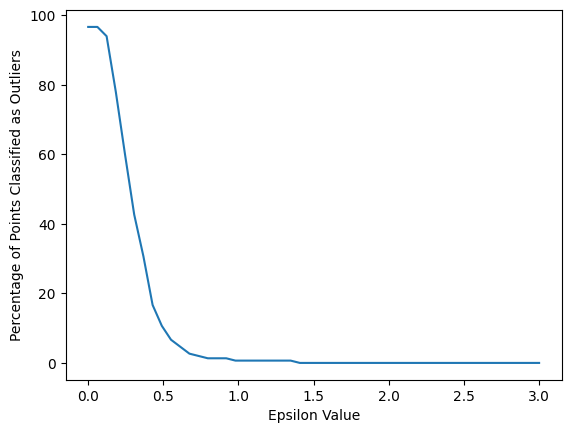

In [275]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent1)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

In [280]:
dbscan1 = DBSCAN(eps=0.9, min_samples=2)
cluster_labels1 = dbscan1.fit_predict(df_Iris_pca)
print(silhouette_score(df_Iris_pca, cluster_labels1))
unique_labels1 = np.unique(cluster_labels1)
num_clusters1= len(unique_labels1) - (1 if -1 in unique_labels1 else 0)  # Exclude noise points (-1)
print(f"Number of clusters: {num_clusters1}")

0.4861238362668088
Number of clusters: 3


In [1]:
#second data set make moons 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_moons
X, _ = make_moons(n_samples=300, noise=0.1)

In [8]:
df_X=pd.DataFrame(X, columns=['Feature1','Feature2'])


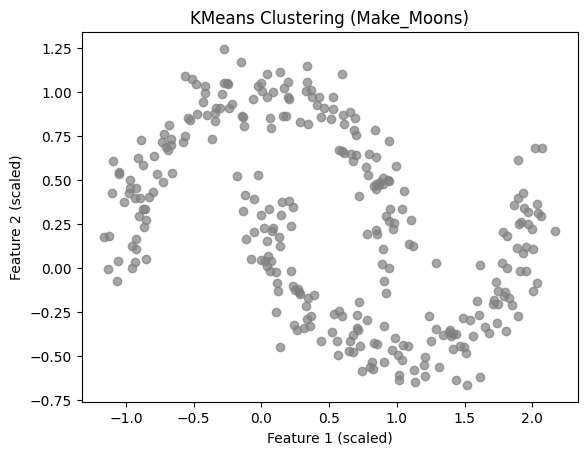

In [10]:
plt.scatter(df_X['Feature1'], df_X['Feature2'], c='gray', alpha=0.7)
plt.title("KMeans Clustering (Make_Moons)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

In [11]:
sc=StandardScaler()
X_scaled=sc.fit_transform(df_X)

In [12]:
#Applying K means
from sklearn.cluster import KMeans
ssd_moon = []
# getting K for 3 features model
for k in range(2,10):
    
    model_moon = KMeans(n_clusters=k)
    
    
    model_moon.fit(X_scaled)
    
    #Sum of squared distances of samples to their closest cluster center.
    ssd_moon.append(model_moon.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

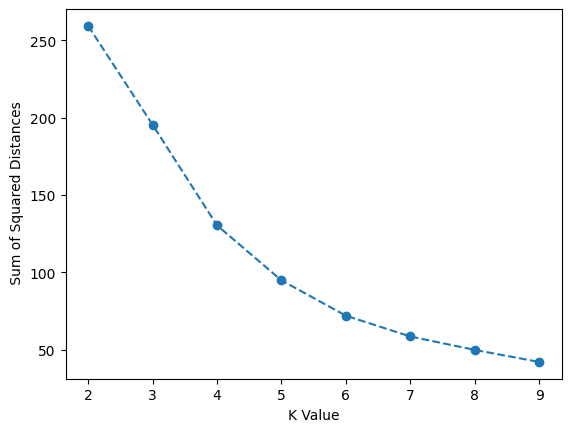

In [13]:
plt.plot(range(2,10),ssd_moon,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [14]:
#lets try K=4 Elbow method
kmeans_moon = KMeans(n_clusters = 4)
y_kmeans_moon = kmeans_moon.fit_predict(X_scaled)

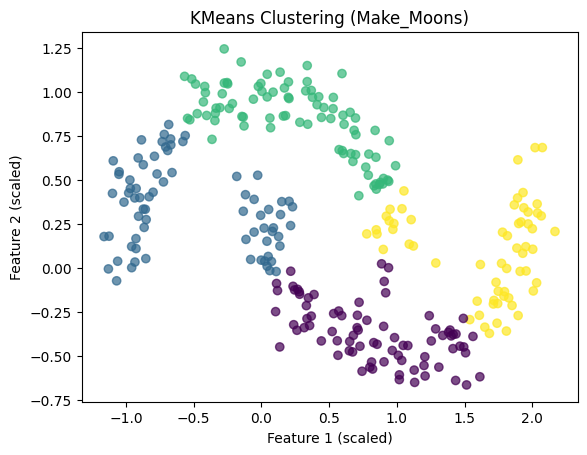

In [15]:
plt.scatter(df_X['Feature1'], df_X['Feature2'], c=y_kmeans_moon, cmap='viridis', alpha=0.7)
plt.title("KMeans Clustering (Make_Moons)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

In [14]:
print(silhouette_score(X_scaled, y_kmeans_moon))

0.42952257413744577


In [17]:
#Agglomerative
from sklearn.cluster import AgglomerativeClustering
num_cluster_moon= np.arange(2,20)
scores_moon=[]
for k in num_cluster_moon:
    model_moon_agg = AgglomerativeClustering(n_clusters=k)
    cluster_labels_moon = model_moon_agg.fit_predict(X_scaled)
    scores_moon.append(silhouette_score(X_scaled, cluster_labels_moon))
    
print(scores_moon)

[np.float64(0.4431814330521341), np.float64(0.35982097648463957), np.float64(0.4016093384380764), np.float64(0.4023795079916043), np.float64(0.4254680168271497), np.float64(0.39804811891102565), np.float64(0.4136483106716499), np.float64(0.40643882290316746), np.float64(0.41398090434743795), np.float64(0.41802422544237483), np.float64(0.40738620387926294), np.float64(0.4224597038961964), np.float64(0.42787520176263105), np.float64(0.42617400906063), np.float64(0.42312929858904585), np.float64(0.42684461559172965), np.float64(0.4091530510671586), np.float64(0.40953638743811366)]


In [ ]:
model_moon_agg_two = AgglomerativeClustering(n_clusters=2)
cluster_labels_moon_two = model_moon_agg_two.fit_predict(X_scaled)


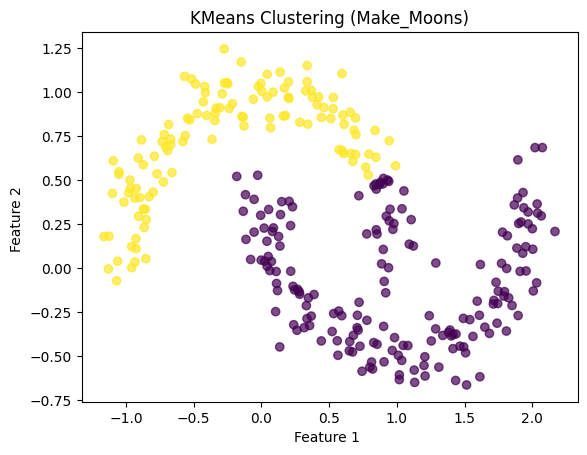

In [19]:
plt.scatter(df_X['Feature1'], df_X['Feature2'], c=cluster_labels_moon_two, cmap='viridis', alpha=0.7)
plt.title("KMeans Clustering (Make_Moons)")
plt.xlabel("Feature 1 ")
plt.ylabel("Feature 2 ")
plt.show()

In [34]:
# Starting DBSCAN
from sklearn.cluster import DBSCAN
outlier_percent_moon = []

for eps in np.linspace(0.001,3,50):
    
    # Create Model
    dbscan_moon = DBSCAN(eps=eps,min_samples=5)
    cluster_labels_moon_dbscan= dbscan_moon.fit_predict(X_scaled)
   
     
    # Log percentage of points that are outliers
    perc_outliers_moon = 100 * np.sum(dbscan_moon.labels_ == -1) / len(cluster_labels_moon_dbscan)
    
    outlier_percent_moon.append(perc_outliers_moon)

Text(0.5, 0, 'Epsilon Value')

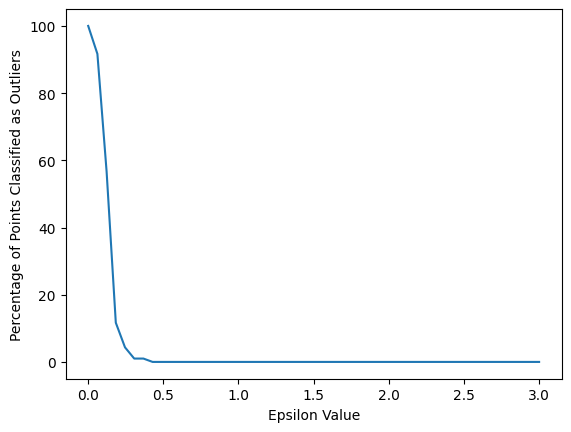

In [35]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent_moon)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

In [54]:
dbscan_moon_1 = DBSCAN(eps=0.3, min_samples=5)
cluster_labels1_moon_three = dbscan_moon_1.fit_predict(X_scaled)
print(silhouette_score(X_scaled, cluster_labels1_moon_three))
unique_labels1_moon = np.unique(cluster_labels1_moon_three)
num_clusters1_moon= len(unique_labels1_moon) - (1 if -1 in unique_labels1_moon else 0)  # Exclude noise points (-1)
print(f"Number of clusters: {num_clusters1_moon}")

0.2749609184069871
Number of clusters: 2


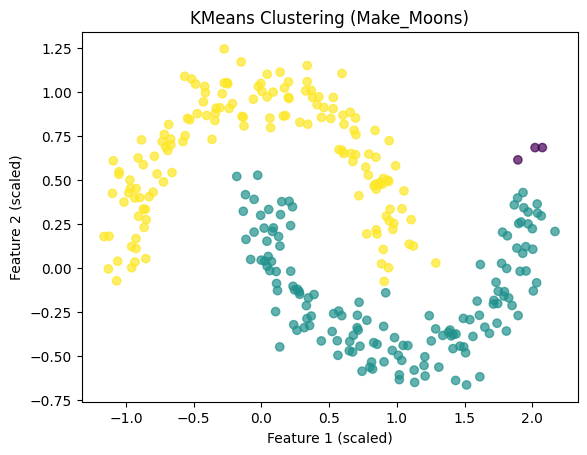

In [55]:
plt.scatter(df_X['Feature1'], df_X['Feature2'], c=cluster_labels1_moon_three, cmap='viridis', alpha=0.7)
plt.title("KMeans Clustering (Make_Moons)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

In [ ]:
#as shown DBSCAN is better than other models for Make moons data set not depending on silhoutte result as from visulization DBSCAN shows better clustring for the data . 
